<h1>Cats vs Dogs</h1>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [37]:
file_path = 'train'
filenames = os.listdir(file_path)
classes = []
for filename in filenames:
    image_class = filename.split(".")[0]
    if image_class == "dog":
        classes.append(1)
    else:
        classes.append(0)
    ## get the data from the libery 

In [59]:
df = pd.DataFrame({"filename": filenames, "category": classes})
df["category"] = df["category"].replace({0: "cat", 1: "dog"})


In [39]:
df.tail()

,filename,category
24995,dog.9995.jpg,dog
24996,dog.9996.jpg,dog
24997,dog.9997.jpg,dog
24998,dog.9998.jpg,dog
24999,dog.9999.jpg,dog


Text(0.5, 1.0, 'Data Distribution')

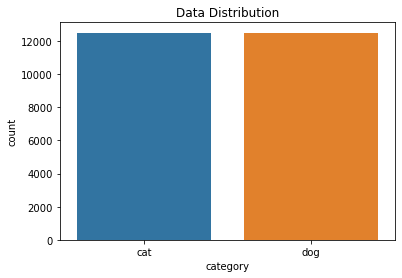

In [40]:
import seaborn as sns


sns.countplot(x='category',data=df).set_title("Data Distribution")

In [75]:
file_path = 'train'
filenames = os.listdir(file_path)
data = pd.DataFrame()
for i in range(len(df.index)):
    o=os.path.join(f'{file_path}', filenames[i])
    img = cv2.imread(o, 0)
    img_resized = cv2.resize(img, (28,28),interpolation = cv2.INTER_AREA)
    img_reshape = img_resized.reshape(28*28)
    one = pd.DataFrame(img_reshape)
    data = pd.concat([data,one],axis=1)


In [78]:
data = new_df.transpose()
data.reset_index(drop=True,inplace=True)



In [79]:
data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,category
0,174,188,199,204,209,215,184,161,135,102,...,28,9,17,40,31,11,4,3,3,cat
1,44,47,51,43,42,52,65,69,75,90,...,55,35,34,51,52,55,57,61,53,cat
2,50,59,60,59,57,54,52,52,50,52,...,116,131,72,75,72,81,128,144,165,cat
3,223,228,227,229,227,226,228,225,223,209,...,160,176,235,250,243,229,213,211,215,cat
4,100,95,133,183,196,238,213,180,153,141,...,99,106,100,96,99,95,80,85,84,cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,142,147,149,152,154,158,159,160,163,164,...,157,169,153,159,163,163,165,167,168,dog
24996,92,90,88,83,95,88,97,98,105,108,...,53,13,20,33,68,82,88,84,83,dog
24997,41,50,44,51,91,111,72,75,101,122,...,153,154,166,160,145,135,136,138,138,dog
24998,243,181,114,90,88,86,94,87,103,98,...,137,135,125,115,98,99,106,112,120,dog


In [81]:

X = np.array(data.drop(columns = ['category']))
y = np.array(df['category'])

In [84]:

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)


<h5>pca</h5>

Text(0, 0.5, 'Cumulative explained variance')

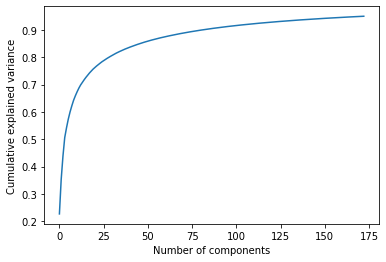

In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [101]:
NCOMPONENTS =75## the best Number of components is 45

pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_train)
X_pca_train_invers=pca.inverse_transform(X_pca_train)
X_pca_test = pca.transform(X_test)
pca_std = np.std(X_pca_train)

print(X_train.shape)
print(X_pca_train.shape)

(18750, 784)
(18750, 75)


In [102]:
inv_pca_test = pca.inverse_transform(X_pca_test)

In [103]:
inv_pca = pca.inverse_transform(X_pca_train)

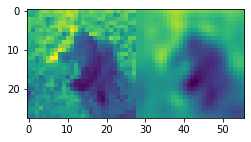

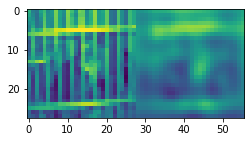

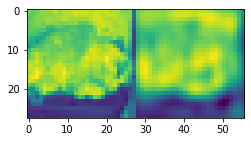

In [104]:
def side_by_side(indexes):
    org = X_train[indexes].reshape(28,28)
    rec = inv_pca[indexes].reshape(28,28)
    pair = np.concatenate((org, rec), axis=1)
    plt.figure(figsize=(4,2))
    plt.imshow(pair)
    plt.show()
    
for index in range(0,3):
    side_by_side(index)

In [94]:
###knn

In [105]:
#befor pca
knn = KNeighborsClassifier(n_neighbors=2)
#Train the model using the training sets
knn.fit(inv_pca, y_train)

#Predict the response for test dataset
y_pred = knn.predict(inv_pca_test)

In [106]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.56608


In [107]:
knn = KNeighborsClassifier(n_neighbors=2)
#Train the model using the training sets
knn.fit(inv_pca, y_train)

#Predict the response for test dataset
y_pred = knn.predict(inv_pca_test)

In [108]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.56608


In [109]:
print(confusion_matrix(y_test,y_pred))

[[2431  718]
 [1994 1107]]


In [110]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         cat       0.55      0.77      0.64      3149
         dog       0.61      0.36      0.45      3101

    accuracy                           0.57      6250
   macro avg       0.58      0.56      0.55      6250
weighted avg       0.58      0.57      0.55      6250



#DecisionTreeClassifier

In [113]:
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(inv_pca, y_train)
dtc_pred = dtc.predict(inv_pca_test)

In [114]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.56608
[[2431  718]
 [1994 1107]]
              precision    recall  f1-score   support

         cat       0.55      0.77      0.64      3149
         dog       0.61      0.36      0.45      3101

    accuracy                           0.57      6250
   macro avg       0.58      0.56      0.55      6250
weighted avg       0.58      0.57      0.55      6250



In [122]:
##RandomForestClassifier

In [123]:
rnd_clf = RandomForestClassifier()
clf=RandomForestClassifier()
clf.fit(inv_pca, y_train)
y_pred = clf.predict(inv_pca_test)
acc=accuracy_score(y_test, y_pred)

In [128]:
print("Accuracy:",acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.64176
[[2115 1034]
 [1205 1896]]
              precision    recall  f1-score   support

         cat       0.64      0.67      0.65      3149
         dog       0.65      0.61      0.63      3101

    accuracy                           0.64      6250
   macro avg       0.64      0.64      0.64      6250
weighted avg       0.64      0.64      0.64      6250



In [124]:
##BaggingClassifier

In [129]:
bc = BaggingClassifier(
    random_state=666
)

In [126]:
bc.fit(inv_pca, y_train)
preds = bc.predict(inv_pca_test)

In [130]:
print('Bagging Classifier accuracy: ', accuracy_score(y_test, preds))


Bagging Classifier accuracy:  0.58768


In [133]:
###RandomForestClassifier

In [132]:
rf_clf=RandomForestClassifier(n_estimators=150)
rf_clf.fit(inv_pca,y_train)
y_pred=rf_clf.predict(inv_pca_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.64736
